In [ ]:
import patoolib
import os

patoolib.extract_archive("Volcanoes_train.tar.gz", outdir="C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Venus_image classification\\volcanoesvenus")
patoolib.extract_archive("Volcanoes_test.tar.gz", outdir="C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Venus_image classification\\volcanoesvenus")

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, add, Dropout, Conv2D, MaxPooling2D
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
train_img = pd.read_csv("train_images.csv", header=None)

X_train = np.array(train_img)
X_train = X_train.reshape(X_train.shape[0], 110, 110, 1)

train_lab = pd.read_csv("train_labels.csv")
train_lab = train_lab.fillna(0)

y_train_full = np.array(train_lab)

In [4]:
test_img = pd.read_csv("test_images.csv", header=None)

X_test = np.array(test_img)
X_test = X_test.reshape(X_test.shape[0], 110, 110, 1)

test_lab = pd.read_csv("test_labels.csv")
test_lab = test_lab.fillna(0)

y_test_full = np.array(test_lab)

In [5]:
y_train1 = y_train_full[:,0]
y_train2 = y_train_full[:,1]
y_train3 = y_train_full[:,2]
y_train4 = y_train_full[:,3]

y_test1 = y_test_full[:,0]
y_test2 = y_test_full[:,1]
y_test3 = y_test_full[:,2]
y_test4 = y_test_full[:,3]

y_train1 = y_train1.reshape(y_train1.shape[0], 1)
y_train2 = y_train2.reshape(y_train2.shape[0], 1)
y_train3 = y_train3.reshape(y_train3.shape[0], 1)
y_train4 = y_train4.reshape(y_train4.shape[0], 1)

y_test1 = y_test1.reshape(y_test1.shape[0], 1)
y_test2 = y_test2.reshape(y_test2.shape[0], 1)
y_test3 = y_test3.reshape(y_test3.shape[0], 1)
y_test4 = y_test4.reshape(y_test4.shape[0], 1)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (110, 110, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 4, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
X_train_scale = X_train/255
X_test_scale = X_test/255

y_train1_scale = y_train1
y_train2_scale = y_train2
y_train3_scale = y_train3
y_train4_scale = y_train4

y_test1_scale = y_test1
y_test2_scale = y_test2
y_test3_scale = y_test3
y_test4_scale = y_test4

In [8]:
H1 = model.fit(X_train_scale, y_train1_scale, epochs=50, batch_size=100,  verbose=1, validation_split=0.2)

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
5600/5600 [==============================] - 116s 21ms/step - loss: 0.4734 - acc: 0.8500 - val_loss: 0.4135 - val_acc: 0.8514
Epoch 2/50
5600/5600 [==============================] - 119s 21ms/step - loss: 0.4484 - acc: 0.8577 - val_loss: 0.4107 - val_acc: 0.8514
Epoch 3/50
5600/5600 [==============================] - 115s 20ms/step - loss: 0.4444 - acc: 0.8586 - val_loss: 0.4300 - val_acc: 0.8514
Epoch 4/50
5600/5600 [==============================] - 114s 20ms/step - loss: 0.4328 - acc: 0.8588 - val_loss: 0.4102 - val_acc: 0.8514
Epoch 5/50
5600/5600 [==============================] - 114s 20ms/step - loss: 0.4241 - acc: 0.8584 - val_loss: 0.4182 - val_acc: 0.8514
Epoch 6/50
5600/5600 [==============================] - 119s 21ms/step - loss: 0.4085 - acc: 0.8584 - val_loss: 0.3655 - val_acc: 0.8514
Epoch 7/50
5600/5600 [==============================] - 118s 21ms/step - loss: 0.3517 - acc: 0.8593 - val_loss: 0.2946 - val_acc: 

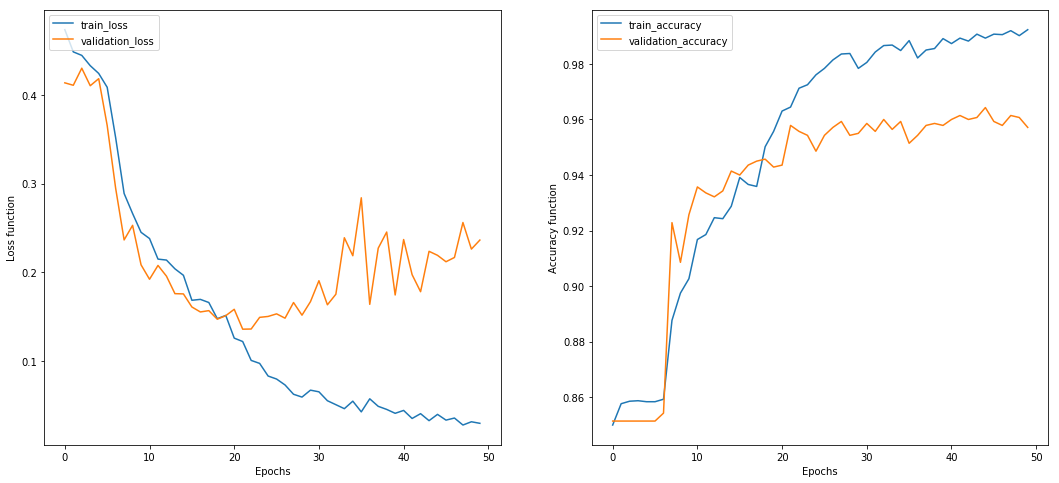

In [11]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(H1.history["loss"], label='train_loss')
plt.plot(H1.history["val_loss"], label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H1.history["acc"], label='train_accuracy')
plt.plot(H1.history["val_acc"], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy function')
plt.legend(loc='upper left')
plt.show()

In [12]:
loss, acc = model.evaluate(X_test_scale, y_test1_scale, verbose = 0)
print("The accuracy in the test dataset for featuring the presense of volcano in Venus", acc*100)
print("The Loss in the test dataset for featuring the presense of volcano in Venus", loss*100)

The accuracy in the test dataset for featuring the presense of volcano in Venus 96.19604974396488
The Loss in the test dataset for featuring the presense of volcano in Venus 26.276159055071407


In [13]:
y_new = model.predict(X_test_scale)
print("The accuracy score between the test and the predicted volcanoes in Venus:", (100 - np.mean(np.abs(y_new - y_test1))))

The accuracy score between the test and the predicted volcanoes in Venus: 99.95978356858902


In [23]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape = (110, 110, 1), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Conv2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Flatten())

model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units = 16, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units = 4, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units = 1, activation = 'linear'))

model1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [ ]:
H2 = model1.fit(X_train_scale, y_train2_scale, epochs=50, batch_size=100,  verbose=1, validation_split=0.2)

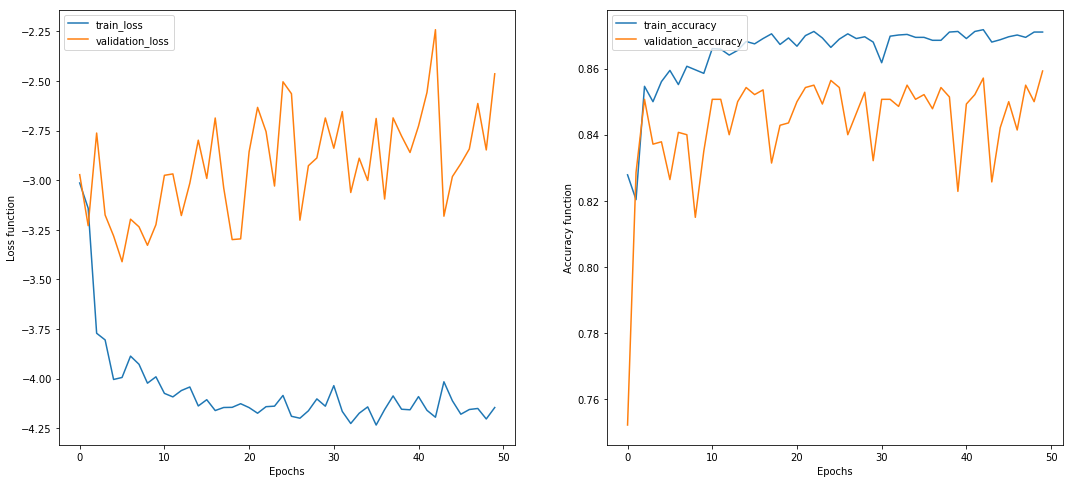

In [16]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(H2.history["loss"], label='train_loss')
plt.plot(H2.history["val_loss"], label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H2.history["acc"], label='train_accuracy')
plt.plot(H2.history["val_acc"], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy function')
plt.legend(loc='upper left')
plt.show()

In [17]:
loss, acc = model1.evaluate(X_test_scale, y_test2_scale, verbose = 1)
print("The accuracy in the test dataset for featuring the volcano type in Venus", acc*100)
print("The Loss in the test dataset for featuring the volcano type in Venus", loss*100)

2734/2734 [==============================] - 20s 7ms/step
The accuracy in the test dataset for featuring the presense of volcano in Venus 84.45501095985267
The Loss in the test dataset for featuring the presense of volcano in Venus -267.4727347966259


In [18]:
y_new1 = model1.predict(X_test_scale)
print("The accuracy score between the test and the predicted volcano type in Venus:", (100 - np.mean(np.abs(y_new1 - y_test2))))

The accuracy score between the test and the predicted volcanoes in Venus: 99.63881448116966


In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape = (110, 110, 1), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Flatten())

model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 16, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 4, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 1, activation = 'linear'))

model2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [ ]:
H3 = model2.fit(X_train_scale, y_train3_scale, epochs=50, batch_size=100,  verbose=1, validation_split=0.2)

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(H3.history["mean_squared_error"], label='train_mean_squared_error')
plt.plot(H3.history["val_mean_squared_error"], label='validation_mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('MSE function')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H3.history["mean_absolute_error"], label='train_mean_absolute_error')
plt.plot(H3.history["val_mean_absolute_error"], label='validation_mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('MAE function')
plt.legend(loc='upper left')
plt.show()

In [ ]:
loss, acc = model2.evaluate(X_test_scale, y_test3_scale, verbose = 1)
print("The accuracy in the test dataset for featuring the radius of the volcano in Venus", acc*100)
print("The Loss in the test dataset for featuring the radius of the volcano in Venus", loss*100)

In [ ]:
y_new2 = model2.predict(X_test_scale)
print("The accuracy score between the test and the predicted radius of the volcano in Venus:", np.mean(np.abs(1-y_new2 /y_test3))*100)

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape = (110, 110, 1), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Flatten())

model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 16, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 4, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 1, activation = 'linear'))

model3.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [ ]:
H4 = model3.fit(X_train_scale, y_train4_scale, epochs=50, batch_size=100,  verbose=1, validation_split=0.2)

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(H4.history["mean_squared_error"], label='train_mean_squared_error')
plt.plot(H4.history["val_mean_squared_error"], label='validation_mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('MSE function')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H4.history["mean_absolute_error"], label='train_mean_absolute_error')
plt.plot(H4.history["val_mean_absolute_error"], label='validation_mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('MAE function')
plt.legend(loc='upper left')
plt.show()

In [ ]:
loss, acc = model3.evaluate(X_test_scale, y_test4_scale, verbose = 1)
print("The accuracy in the test dataset for featuring the number of volcano in Venus", acc*100)
print("The Loss in the test dataset for featuring the number of volcano in Venus", loss*100)

In [ ]:
y_new3 = model3.predict(X_test_scale)
print("The accuracy score between the test and the predicted number of volcanoes in Venus:", np.mean(np.abs(1-y_new3 /y_test4))*100)